As queries grow in complexity or need more specific conditions for subsets of data, an alternative approach known as **subqueries** can offer a more concise and focused approach, especially when dealing with aggregated results or specific subsets of data related to each row.

In comparison to `JOIN`, subqueries can sometimes simplify queries by allowing more granular control over individual row-related conditions or aggregations.

* **Subqueries**, also known as **nested queries**, are queries embedded within another query.
* They allow us to perform complex operations by breaking them down into simpler steps.
* They can be used in different parts of a SQL statement, such as the `SELECT`, `FROM`, or `WHERE` clauses.
* Subqueries can return a single value (**scaler query**), a list of values, or a table of results.

**Example**

```mysql
SELECT Product.ProductID, Product.ProductName
FROM Product
WHERE ProductID NOT IN (
    -- Subquery: Fetch ProductID from Sale
    SELECT DISTINCT ProductID		
    FROM Sale
);
```

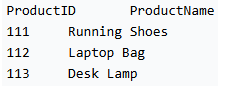


This example demonstrates that, compared to `JOIN` operations, using subqueries in SQL provides a structured approach that can simplify the construction of complex queries. 
* Subqueries allow for a step-by-step method in query development, making it easier to break down intricate problems into more manageable components.
* This structured approach enhances the clarity of the overall query and facilitates a systematic build-up of conditions and filters.
* By employing subqueries, developers can achieve a more organized and readable SQL code when dealing with complex scenarios, promoting a logical and straightforward methodology in query construction.

# JOIN vs. subquery

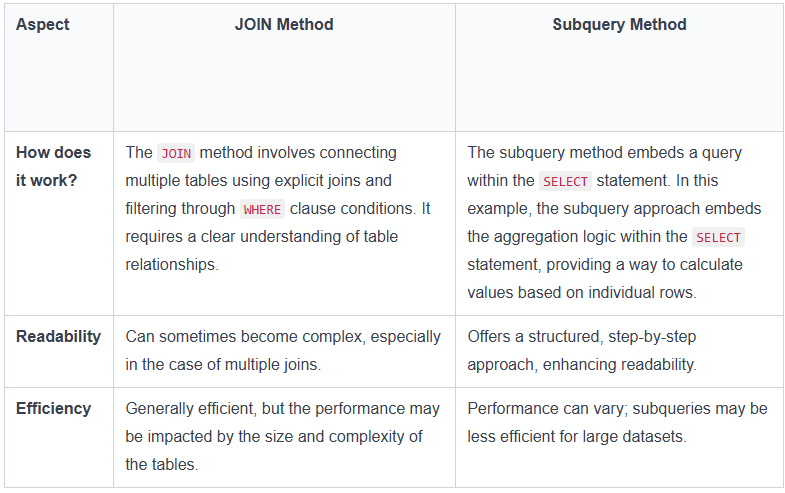

# Nested Column Queries

**We’ll see nested queries that return values belonging to the same column.**

```mysql
-- Find the names of all the actors who have a Facebook presence

SELECT FirstName, SecondName
FROM Actors
WHERE Id = ANY (SELECT ActorId
                FROM DigitalAssets
                WHERE AssetType = 'Facebook');
                    
```

> The **ANY** clause has an alias **IN** that can be used interchangeably.

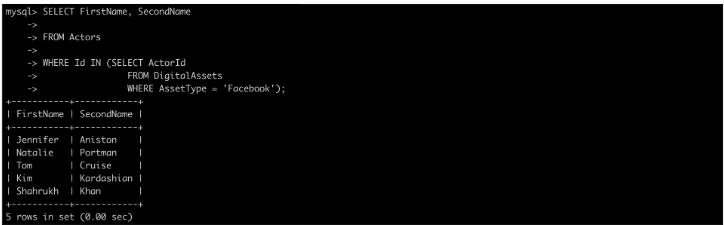



```mysql
-- Find the names of all the actors who have a Facebook presence

SELECT FirstName, SecondName
FROM Actors
WHERE Id IN (SELECT ActorId
             FROM DigitalAssets
             WHERE AssetType = 'Facebook');
```

> The **ANY** clause has an alias **IN** that can be used interchangeably.

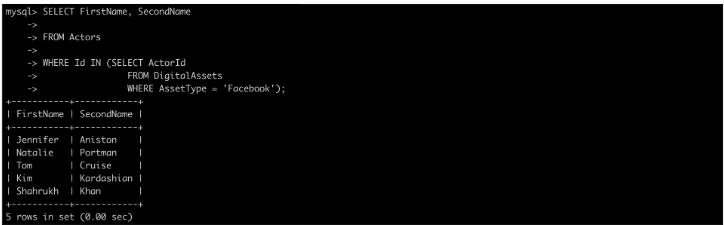

```mysql
-- find out the list of actors that have a net worth greater than all the actors whose first name starts with the letter ‘J’

SELECT FirstName, SecondName 
FROM Actors 
WHERE NetworthInMillions > ALL (SELECT NetworthInMillions 
                                FROM Actors
                                WHERE FirstName LIKE "j%");
```

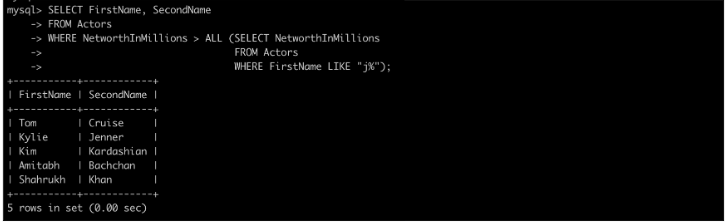

> * The operator `ANY`, and its alias `IN`, match at least one value from a group of values.
> * On the contrary, there’s another operator, `ALL`, that must match all the values in the group.

# Nested Row Queries

* We’ll study nested queries that return rows, allowing the outer query to match on multiple different column values.
* Furthermore, so far, we have used nested queries only with the `WHERE` clause, but now we’ll also use them with the `FROM` clause.

**Demonstrate how nested queries can be used with the `FROM` clause**.

```mysql
-- list of all the actors whose latest update to any of their online accounts was on the day of their birthday

SELECT FirstName
FROM Actors
INNER JOIN DigitalAssets
ON Id=ActorId 
AND MONTH(DoB) = MONTH(LastUpdatedOn) 
AND DAY(DoB) = DAY(LastUpdatedOn);
```

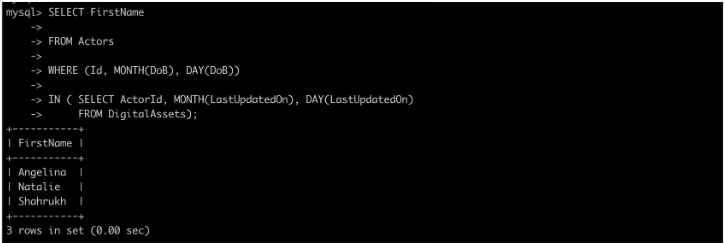

**Instead of the inner join, we can also use a nested query.**

```mysql
SELECT FirstName
FROM Actors 
WHERE (Id, MONTH(DoB), DAY(DoB))
IN ( SELECT ActorId, MONTH(LastUpdatedOn), DAY(LastUpdatedOn)
     FROM DigitalAssets);
```

**Demonstrate using a nested query with the FROM clause.**

```mysql
-- find out which of her online accounts Kim Kardashian most recently updated

SELECT FirstName, AssetType, LastUpdatedOn
FROM Actors
INNER JOIN (SELECT ActorId, AssetType, LastUpdatedOn 
            FROM DigitalAssets) AS tbl 
ON ActorId = Id
WHERE FirstName = "Kim"
ORDER BY LastUpdatedOn DESC LIMIT 1;
```

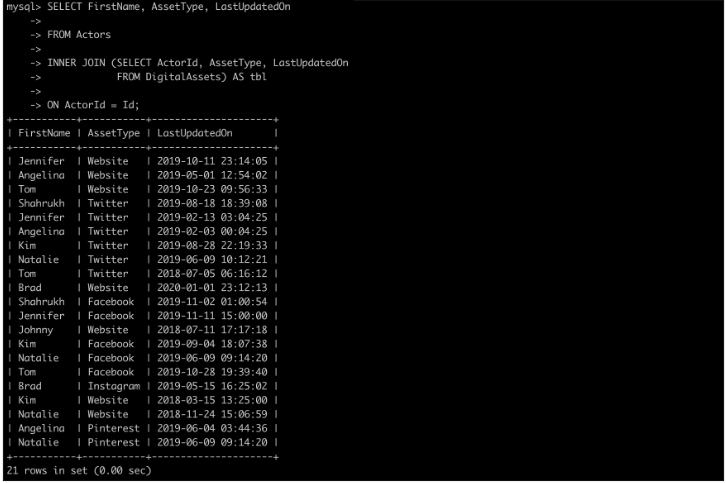



# EXISTS & NOT EXISTS Operator

We’ll learn about the boolean operator `EXISTS` and its complement, `NOT EXISTS`. 

The `EXISTS` operator is usually used to test **if a subquery returns any rows or none at all**.

```mysql
SELECT *
FROM Actors
WHERE EXISTS ( SELECT * 
               FROM DigitalAssets
               WHERE BINARY URL LIKE "%clooney%"); 

SELECT *
FROM Actors
WHERE NOT EXISTS ( SELECT * 
               FROM DigitalAssets
               WHERE BINARY URL LIKE "%clooney%"); 
```

> Note we have used the **BINARY** operator to make the comparison **case-insensitive** which is not required if the collation is already set to be **case-insensitive** for the database.

# Correlated Queries

* **Correlated queries** are a type of nested queries.
* The distinguishing feature about them is that the inner query references a table or a column from the outer query.

Let’s say we want to know which actors have their first name as part of their Twitter handle. 

We can use an inner join query as follows:

```mysql

SELECT FirstName
FROM Actors 
INNER JOIN DigitalAssets
ON Id = ActorId
WHERE URL LIKE CONCAT("%",FirstName,"%") 
AND AssetType="Twitter";
```

An alternative is to write a correlated query to glean the same information from the database. 

Let’s see what the query looks like:

```mysql
SELECT FirstName
FROM Actors
WHERE EXISTS (SELECT URL 
              FROM DigitalAssets
              WHERE URL LIKE CONCAT("%",FirstName,"%") 
              AND AssetType="Twitter");
              
```

* The inner query references the column FirstName in its `WHERE` clause, even though FirstName is part of the Actors table, which is referenced only in the outer query. 
* It is legal to access a table or any of its columns referenced in the outer query inside a subquery.